In [101]:
import pandas as pd
# crop_and_soil_dataSet.csv  = crop types and soil conditions (8000 Samples)
# plant_growth_dataSet.csv = Plant growing conditons (193 Samples)
# crop_recommendation.csv = crop types and soil conditions (2200 Samples)

# There are some images of soil type below - 144 Images
# https://www.kaggle.com/datasets/matshidiso/soil-types
# 1555 images
# https://www.kaggle.com/datasets/jhislainematchouath/soil-types-
# 881 images
# https://www.kaggle.com/datasets/kurniaaisyah/soil-types-dataset
# 1360 images
# https://www.kaggle.com/datasets/thirishag/soil-types

In [4]:
# In this lab, we will use DT and FR to predict the output class for the Iris flower.

# import the required libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text # this is used to show the DT Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics # this is to find the accuracy score


In [103]:
# import matplotlib.pyplot as plt

# name_counts.head(10).plot(kind="bar", figsize=(10,5), title="Top 10 Most Common Names")
# plt.xlabel(df1["Soil Type"])
# plt.ylabel(df1["Soil Type"].value_counts())
# plt.show()

In [5]:
df_old = pd.read_csv("crop_and_soil_dataSet.csv")
df_old.head()

df = pd.read_csv("crop_recommendation.csv")
df.head()
count = df["Crop"].value_counts()
print(count)

Crop
Rice           100
Maize          100
ChickPea       100
KidneyBeans    100
PigeonPeas     100
MothBeans      100
MungBean       100
Blackgram      100
Lentil         100
Pomegranate    100
Banana         100
Mango          100
Grapes         100
Watermelon     100
Muskmelon      100
Apple          100
Orange         100
Papaya         100
Coconut        100
Cotton         100
Jute           100
Coffee         100
Name: count, dtype: int64


In [6]:
df_old.head()


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.head()


In [105]:
# import matplotlib.pyplot as plt

# name_counts.head(10).plot(kind="bar", figsize=(10,5), title="Top 10 Most Common Names")
# plt.xlabel(df1["Soil Type"])
# plt.ylabel(df1["Soil Type"].value_counts())
# plt.show()

In [106]:
print(df.columns)
print(df_old.columns)

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


array([[<Axes: title={'center': 'Temparature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Moisture'}>,
        <Axes: title={'center': 'Nitrogen'}>],
       [<Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'Phosphorous'}>]], dtype=object)

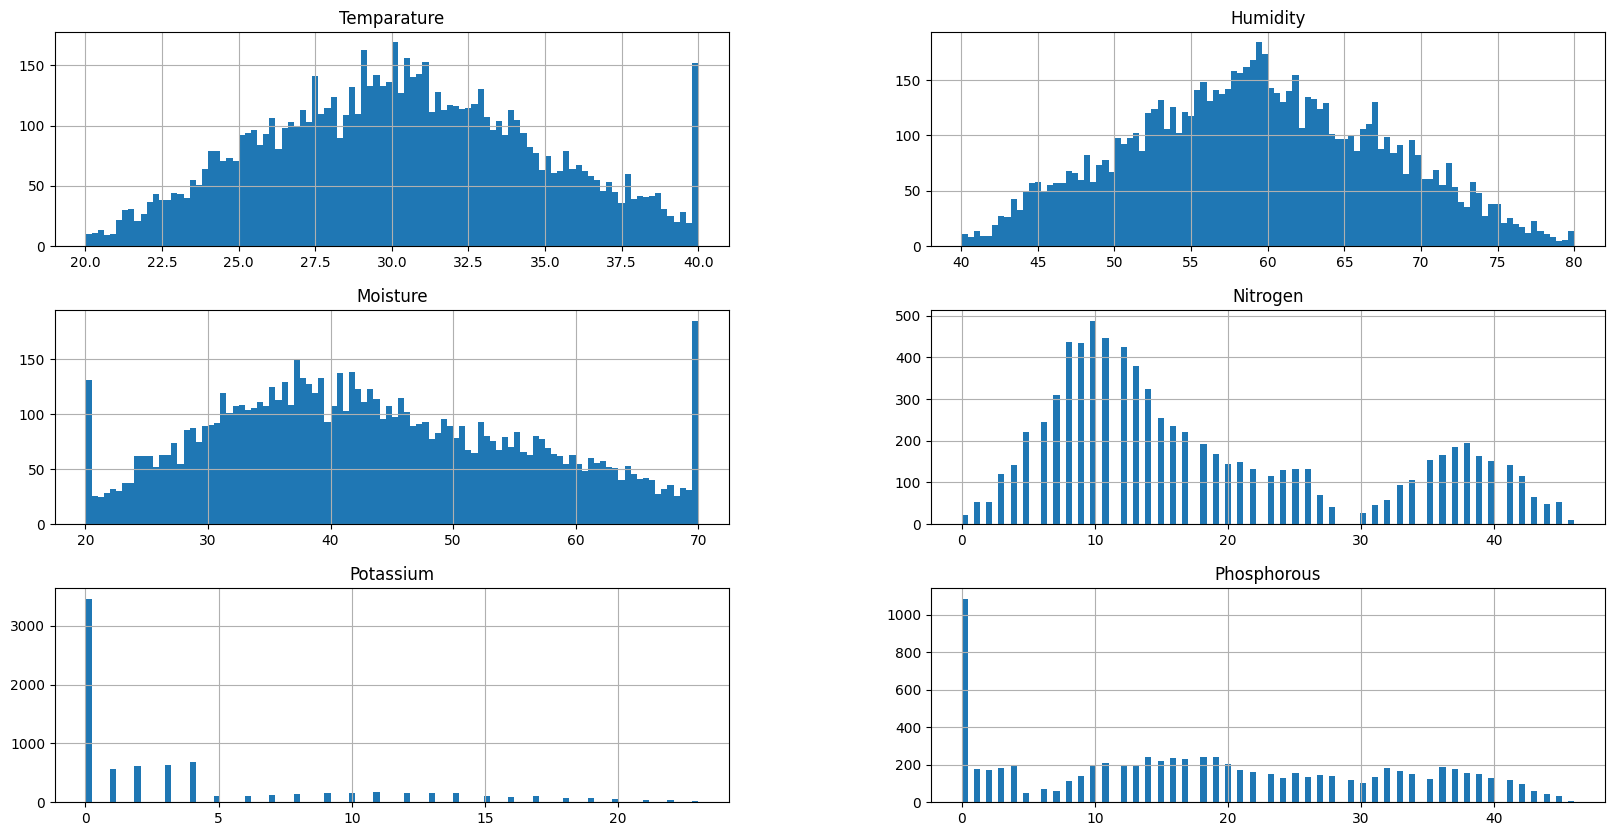

In [107]:
df_old.hist(bins=100, figsize=(20,10))

## Try with df data

In [108]:
print(df.columns)

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')


In [109]:
x1_feature = ['Nitrogen','Phosphorus','Potassium','Temperature', 'Humidity', 'pH_Value', 'Rainfall']
y1_feature = ['Crop']

print(x1_feature)
print(y1_feature)

x1 = df.loc[:, x1_feature].values
y1 = df.loc[:, y1_feature].values

print("X1 Shape: " , x1.shape)
print("Y1 Shape: " , y1.shape)

['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
['Crop']
X1 Shape:  (2200, 7)
Y1 Shape:  (2200, 1)


array([[<Axes: title={'center': 'Nitrogen'}>,
        <Axes: title={'center': 'Phosphorus'}>,
        <Axes: title={'center': 'Potassium'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'pH_Value'}>],
       [<Axes: title={'center': 'Rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

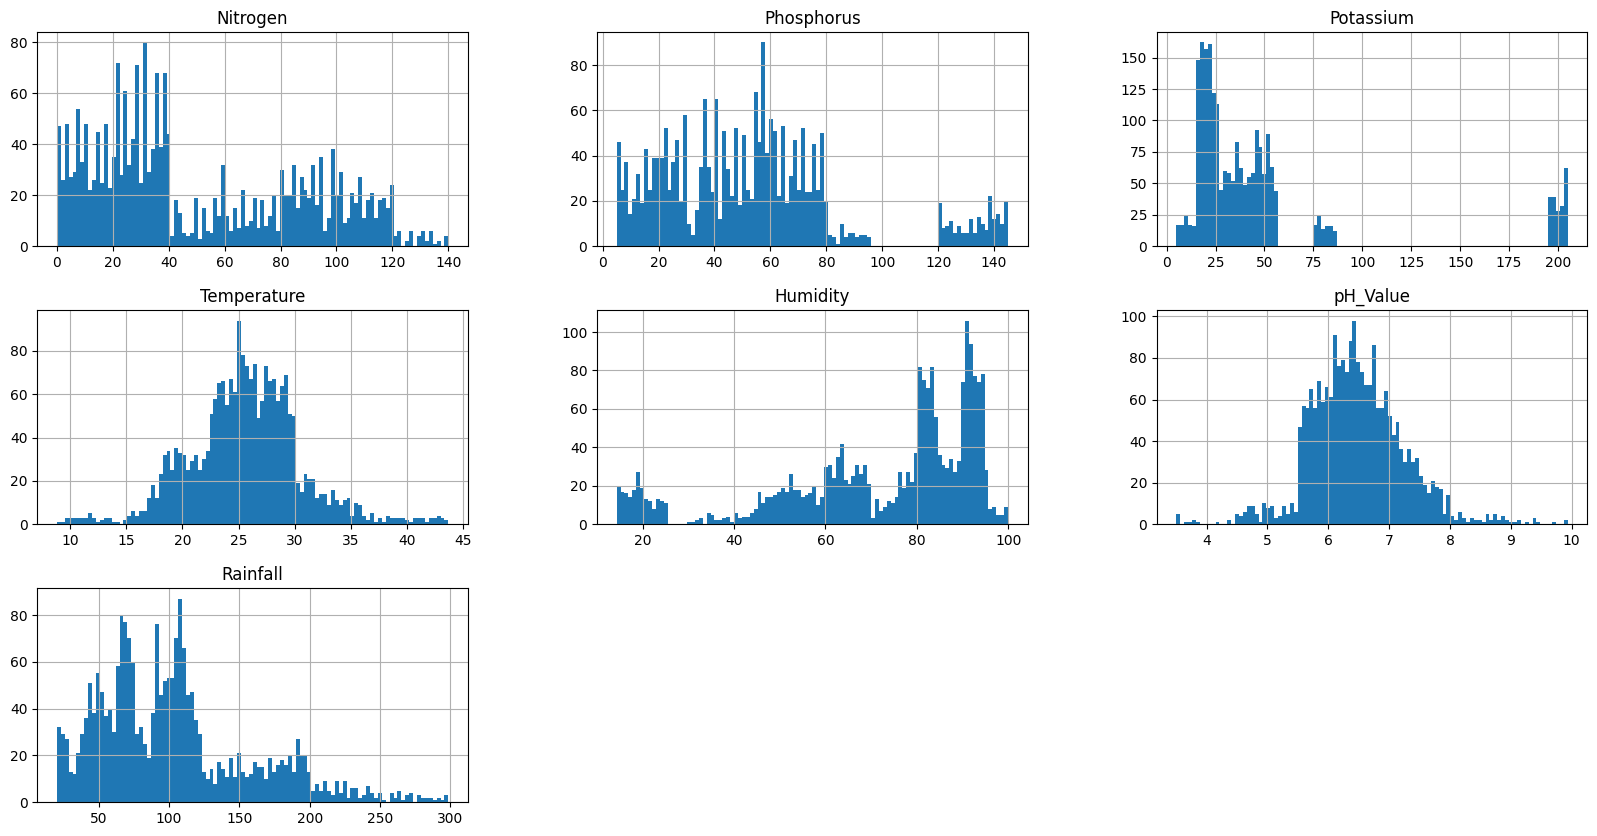

In [110]:
df.hist(bins=100, figsize=(20,10))

In [111]:
# Task 3: Split the dataset (both X and y) into training set and test set using the train_test_split() function

X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)


print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)
print("Y_train shape : " , Y_train.shape)
print("Y_test shape : " , Y_test.shape)

X_train shape :  (1540, 7)
X_test shape :  (660, 7)
Y_train shape :  (1540, 1)
Y_test shape :  (660, 1)


In [112]:
#Task 4: create and train the DT Model with maximum tree depth = 3.
# more information about the sklearn DecisionTreeClassifier can be found here
# https://scikit-learn.org/stable/modules/gener

from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier(random_state=0, max_depth=15)
decisionTree_model = decisionTree_model.fit(X_train, Y_train)

# print the tree structure using the export_text() function, more about this function is found here
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

tree = export_text(decisionTree_model, feature_names = x1_feature )
print(tree)

|--- Potassium <= 140.00
|   |--- Humidity <= 27.98
|   |   |--- pH_Value <= 5.98
|   |   |   |--- class: KidneyBeans
|   |   |--- pH_Value >  5.98
|   |   |   |--- class: ChickPea
|   |--- Humidity >  27.98
|   |   |--- Rainfall <= 30.18
|   |   |   |--- class: Muskmelon
|   |   |--- Rainfall >  30.18
|   |   |   |--- Humidity <= 73.64
|   |   |   |   |--- Nitrogen <= 59.50
|   |   |   |   |   |--- Rainfall <= 82.08
|   |   |   |   |   |   |--- Rainfall <= 59.37
|   |   |   |   |   |   |   |--- Humidity <= 60.03
|   |   |   |   |   |   |   |   |--- class: MothBeans
|   |   |   |   |   |   |   |--- Humidity >  60.03
|   |   |   |   |   |   |   |   |--- Phosphorus <= 52.00
|   |   |   |   |   |   |   |   |   |--- class: MothBeans
|   |   |   |   |   |   |   |   |--- Phosphorus >  52.00
|   |   |   |   |   |   |   |   |   |--- Temperature <= 30.17
|   |   |   |   |   |   |   |   |   |   |--- class: Lentil
|   |   |   |   |   |   |   |   |   |--- Temperature >  30.17
|   |   |   |   |   |

In [113]:
#Task 5: use the DT model to predict the output for the test dataset and print the accuracy of the predicted values
# print the accuracy

Y_pred = decisionTree_model.predict(X_test)
# print(Y_pred)

print("Train Accuracy Model_DT: ", decisionTree_model.score(X_train, Y_train))
dt_accuracy = metrics.accuracy_score(Y_test, Y_pred)

print("Test Accuracy: ",dt_accuracy)
print(f'Accuracy of the Decision tree model on the test set: {dt_accuracy * 100:.2f}%')

Train Accuracy Model_DT:  1.0
Test Accuracy:  0.9803030303030303
Accuracy of the Decision tree model on the test set: 98.03%


In [114]:
#Task 6: Create a RandomForest Classifier with 100 trees. more about this can be found here
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Flattern Y_train and Y_test to 1D array.
# In scikit-learn, the target variable y is expected to be a one-dimensional array with shape (n_samples,). 
# However, when using pandas DataFrames or Series, y might have a shape of (n_samples, 1), which is a column vector. 
# This can lead to warnings or errors during model fitting. To ensure compatibility and avoid such issues, 
# it's recommended to flatten y into a one-dimensional array using the .ravel() method.
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

print("X training data:\n", X_train[:5])
print("\n")
print("Y training data:\n", Y_train[:5])
print("\n")
print("X test data:\n", X_test[:5])
print("\n")
print("Y test data:\n", Y_test[:5])
print("\n")

print("\n --- Going to predict --- \n")

# # Create the model - Random Forest
rf_Model = RandomForestClassifier(n_estimators=100, random_state=0)

# # Fit the model with data
rf_Model = rf_Model.fit(X_train, Y_train)

# # Print prediction
y_predict_rf = rf_Model.predict(X_test)
# print(y_predict_rf)
# print("\n")

print("Y test data:\n", Y_test[:5])
print("\n")
print("Y predict data:\n", y_predict_rf[:5])
print("\n")

print(" --- Accuracy --- \n")

rf_accuracy = accuracy_score(Y_test, y_predict_rf)
# # print(accuracy)
print(f'Accuracy of the Random Forest model on the test set: {rf_accuracy * 100:.2f}%')

X training data:
 [[ 93.          56.          42.          23.85724032  82.22572988
    7.3827626  195.0948311 ]
 [ 82.          25.          51.          24.31334971  87.47409052
    6.07420962  48.11248366]
 [  4.           6.           7.          23.01014302  91.11764246
    6.70888967 112.6738296 ]
 [  7.          63.          24.          22.95458237  24.03553105
    5.85861787 107.7315386 ]
 [ 13.          23.           6.          23.96147583  90.26408017
    7.36533811 102.6958703 ]]


Y training data:
 ['Rice' 'Watermelon' 'Orange' 'KidneyBeans' 'Orange']


X test data:
 [[105.          14.          50.          26.2148837   87.6883982
    6.41905219  59.65590798]
 [ 91.          12.          46.          24.64458469  85.49938185
    6.34394252  48.31219031]
 [ 14.         121.         203.           9.72445761  83.74765639
    6.15868941  74.46411148]
 [ 52.          73.          79.          17.25769499  18.74943955
    7.84033939  94.00287214]
 [ 32.          66.         

## Try with df_old Data

array([[<Axes: title={'center': 'Temparature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Moisture'}>,
        <Axes: title={'center': 'Nitrogen'}>],
       [<Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'Phosphorous'}>]], dtype=object)

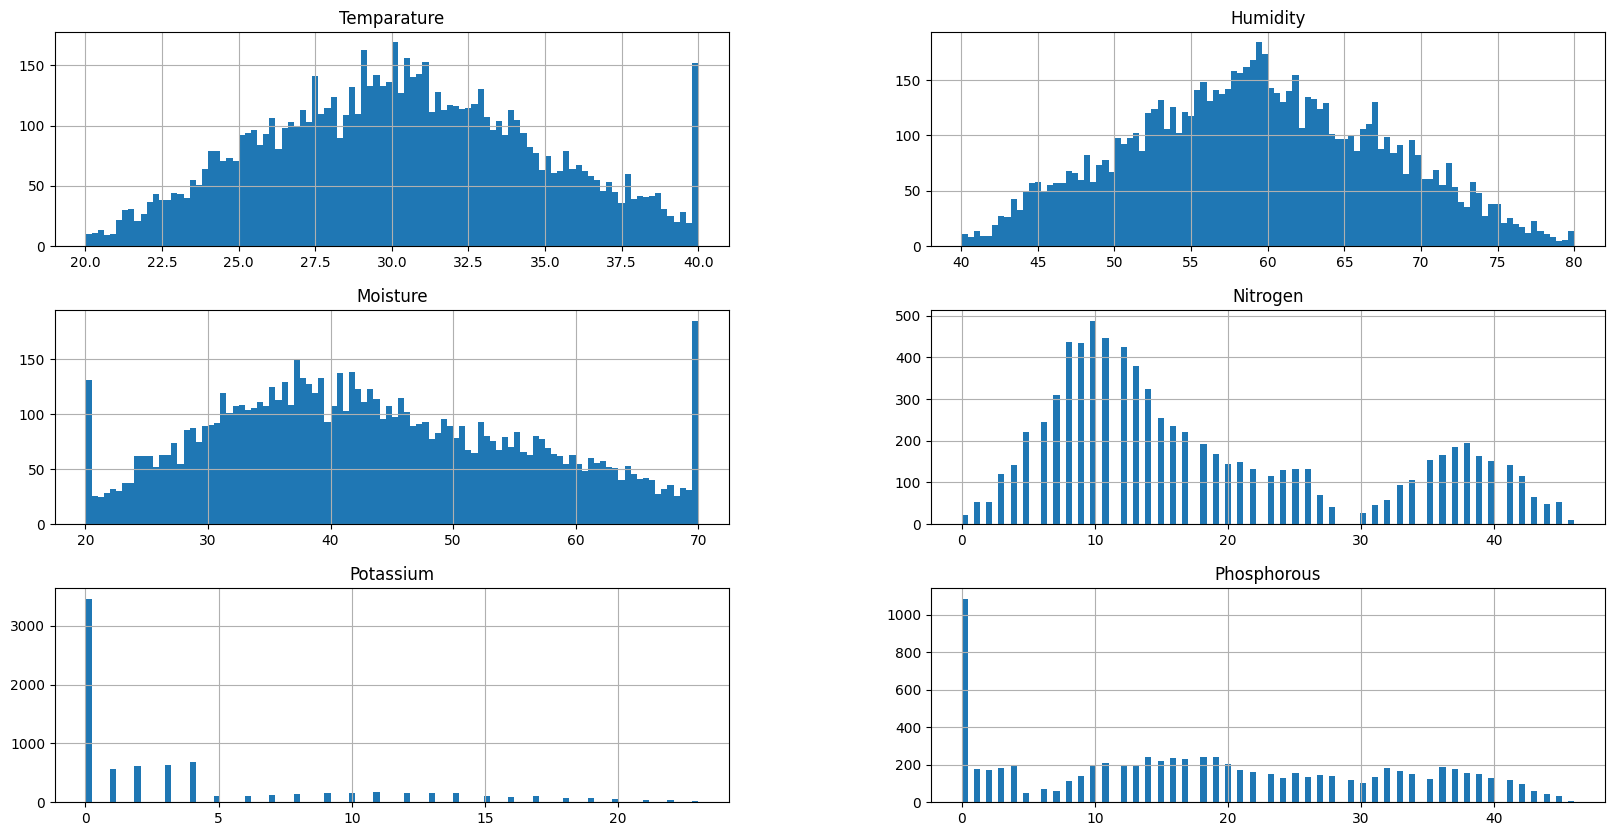

In [224]:
df_old = pd.read_csv("crop_and_soil_dataSet.csv")
df_old.head()
df_old.hist(figsize=(20,10), bins=100)

In [225]:
print(df_old.columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [226]:
df_old.dtypes

Temparature        float64
Humidity           float64
Moisture           float64
Soil Type           object
Crop Type           object
Nitrogen             int64
Potassium            int64
Phosphorous          int64
Fertilizer Name     object
dtype: object

In [227]:
# df_old['tem_moi_avg'] = (df_old['Humidity'] + df_old['Moisture'])/2
# cc = 1
# print(df_old['Humidity'][:cc])
# print(df_old['Moisture'][:cc])
# print(df_old['tem_moi_avg'][:cc])

In [228]:
count = df_old.isna().sum()
# count = df_old.duplicated().sum()
print(count)

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [229]:
# df_old.dtypes

In [230]:
df_old.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [231]:
# df_old.hist(figsize=(20,20), bins=100)

In [245]:
df_old['Potassium'].isna().sum()

np.int64(0)

<Axes: xlabel='index', ylabel='Phosphorous'>

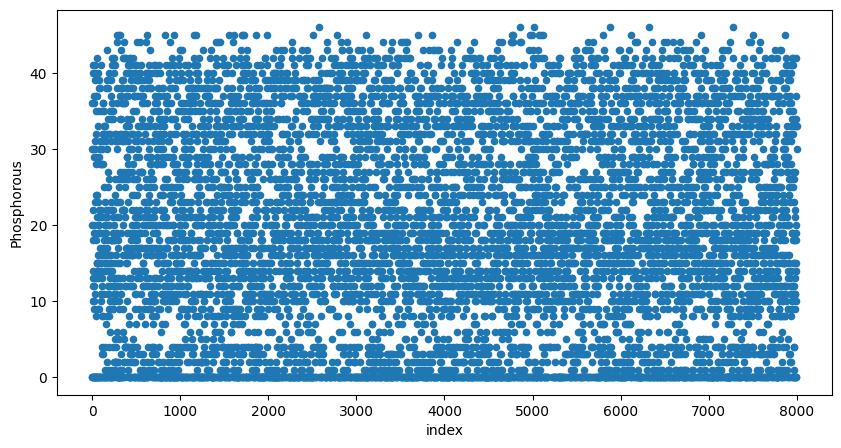

In [246]:
df_old.reset_index().plot(kind='scatter', y='Phosphorous', x='index', figsize=(10,5))

<Axes: xlabel='index'>

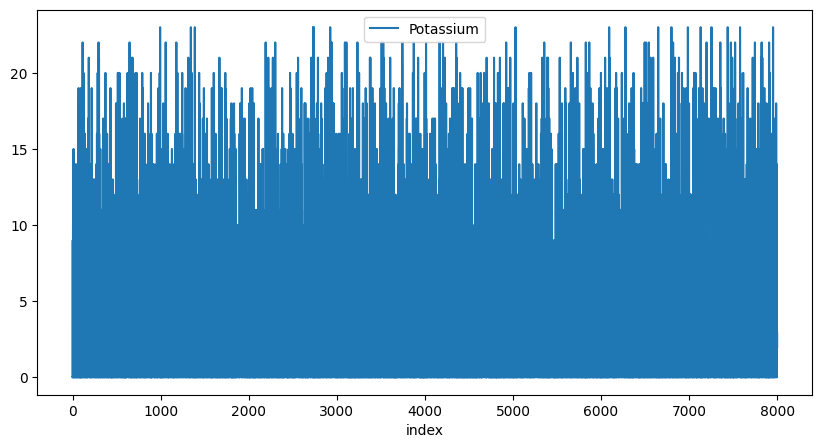

In [260]:
df_old.reset_index().plot(kind='line', y='Potassium', x='index', figsize=(10,5))

## Feature Engineerig for Phosphorous
### Change Phosphorous
Phosphorous can not be 0. This datase have almost 1800 sample out of 8000 samples which have 0 values. I am going to replace then with interpolate values while sorting them as the general combination.

In [448]:
# Sort the DataFrame by the 'Temperature' column
df_sorted = df_old.sort_values(by='Temparature')
# df_sorted = df_old.sort_values(by='Temparature', ascending=False)

# print(df_sorted['Phosphorous'].head)
# print(df_sorted['Phosphorous'].value_counts())

# Plot both 'Temperature' and 'Potassium' on the same graph
# df_sorted.reset_index().plot(kind='line', y=['Temparature', 'Potassium'], x='index', figsize=(10,5))

In [449]:
df_sorted['temp_sort_Phosphorous'] = df_sorted['Phosphorous']
df_sorted.columns
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous
3997,20.00,55.62,31.35,Loamy,Barley,9,20,16,17-17-17,16
2581,20.03,52.64,70.00,Sandy,Sugarcane,13,0,13,20-20,13
7411,20.05,52.70,59.86,Black,Oil seeds,36,0,0,10-26-26,0
4913,20.09,57.36,36.23,Clayey,Sugarcane,10,17,18,14-35-14,18
4802,20.09,49.43,29.64,Black,Pulses,17,11,11,14-35-14,11


In [450]:
import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['temp_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

In [451]:
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous
3997,20.00,55.62,31.35,Loamy,Barley,9,20,16,17-17-17,16.0
2581,20.03,52.64,70.00,Sandy,Sugarcane,13,0,13,20-20,13.0
7411,20.05,52.70,59.86,Black,Oil seeds,36,0,0,10-26-26,NaN
4913,20.09,57.36,36.23,Clayey,Sugarcane,10,17,18,14-35-14,18.0
4802,20.09,49.43,29.64,Black,Pulses,17,11,11,14-35-14,11.0


In [452]:
df_sorted['temp_sort_Phosphorous'] = df_sorted['temp_sort_Phosphorous'].interpolate()
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous
3997,20.00,55.62,31.35,Loamy,Barley,9,20,16,17-17-17,16.0
2581,20.03,52.64,70.00,Sandy,Sugarcane,13,0,13,20-20,13.0
7411,20.05,52.70,59.86,Black,Oil seeds,36,0,0,10-26-26,15.5
4913,20.09,57.36,36.23,Clayey,Sugarcane,10,17,18,14-35-14,18.0
4802,20.09,49.43,29.64,Black,Pulses,17,11,11,14-35-14,11.0


In [453]:
# Sort the DataFrame by the 'Temperature' column
df_sorted = df_sorted.sort_values(by='Nitrogen')

In [454]:
df_sorted['nitr_sort_Phosphorous'] = df_sorted['Phosphorous']
df_sorted.columns
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous,nitr_sort_Phosphorous
3531,29.77,66.60,24.94,Loamy,Ground Nuts,0,21,15,DAP,15.0,15
4917,33.95,66.85,45.81,Loamy,Oil seeds,0,13,32,Urea,32.0,32
7448,29.14,69.95,21.50,Loamy,Ground Nuts,0,16,17,10-26-26,17.0,17
921,27.60,56.81,32.67,Sandy,Pulses,0,14,20,DAP,20.0,20
3820,32.81,55.45,48.08,Loamy,Millets,0,16,15,28-28,15.0,15


In [455]:
import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['nitr_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

In [456]:
# df_sorted['nitr_sort_Phosphorous'] = df_sorted['nitr_sort_Phosphorous'].interpolate()
df_sorted.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,temp_sort_Phosphorous,nitr_sort_Phosphorous
3531,29.77,66.60,24.94,Loamy,Ground Nuts,0,21,15,DAP,15.0,15.0
4917,33.95,66.85,45.81,Loamy,Oil seeds,0,13,32,Urea,32.0,32.0
7448,29.14,69.95,21.50,Loamy,Ground Nuts,0,16,17,10-26-26,17.0,17.0
921,27.60,56.81,32.67,Sandy,Pulses,0,14,20,DAP,20.0,20.0
3820,32.81,55.45,48.08,Loamy,Millets,0,16,15,28-28,15.0,15.0


In [457]:
# Sort the DataFrame by the 'Temperature' column
df_sorted = df_sorted.sort_values(by='Moisture')

df_sorted['mois_sort_Phosphorous'] = df_sorted['Phosphorous']
print(df_sorted.columns)
print()
print(df_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['mois_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

df_sorted['mois_sort_Phosphorous'] = df_sorted['mois_sort_Phosphorous'].interpolate()
print(df_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous'],
      dtype='object')

      Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
6592        26.36     64.53      20.0     Black  Sugarcane         0   
455         32.66     55.25      20.0       Red      Paddy         0   
3229        28.93     58.65      20.0     Loamy  Sugarcane        13   
1416        23.40     62.09      20.0    Clayey    Millets         9   
4484        29.16     50.81      20.0     Black    Millets         7   

      Potassium  Phosphorous Fertilizer Name  temp_sort_Phosphorous  \
6592         21           19        17-17-17                   19.0   
455          13           16        10-26-26                   16.0   
3229          2           37           20-20                   37.0   
1416          3           38    

In [458]:
# Sort the DataFrame by the 'Temperature' column
df_sorted = df_sorted.sort_values(by='Humidity')

df_sorted['humd_sort_Phosphorous'] = df_sorted['Phosphorous']
print(df_sorted.columns)
print()
print(df_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_sorted['humd_sort_Phosphorous'] = df_sorted.apply(
    lambda row: row['Phosphorous'] if row['Phosphorous'] != 0 else np.nan, axis=1
)

df_sorted['humd_sort_Phosphorous'] = df_sorted['humd_sort_Phosphorous'].interpolate()
print(df_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous', 'humd_sort_Phosphorous'],
      dtype='object')

      Temparature  Humidity  Moisture Soil Type Crop Type  Nitrogen  \
4215        28.24     40.02     40.05       Red    Pulses         1   
7001        27.53     40.07     31.84     Sandy    Pulses        14   
1623        28.76     40.17     64.52     Sandy   Millets        14   
7653        21.26     40.17     21.00     Loamy     Wheat        13   
430         24.06     40.20     34.24     Black     Wheat         2   

      Potassium  Phosphorous Fertilizer Name  temp_sort_Phosphorous  \
4215         17           15           20-20                   15.0   
7001         10           15           28-28                   15.0   
1623         10           15           20-20                   15.0   
7653         

In [459]:
df_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous', 'humd_sort_Phosphorous'],
      dtype='object')

In [460]:
df_sorted['final_Phosphorous'] = (df_sorted['temp_sort_Phosphorous'] + df_sorted['nitr_sort_Phosphorous'] + df_sorted['mois_sort_Phosphorous'] + df_sorted['humd_sort_Phosphorous'])
df_sorted['final_Phosphorous'] = df_sorted['final_Phosphorous'] / 4
df_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'temp_sort_Phosphorous', 'nitr_sort_Phosphorous',
       'mois_sort_Phosphorous', 'humd_sort_Phosphorous', 'final_Phosphorous'],
      dtype='object')

In [461]:
df_sorted = df_sorted.drop(columns=['temp_sort_Phosphorous', 'nitr_sort_Phosphorous', 'mois_sort_Phosphorous', 'humd_sort_Phosphorous'])

In [462]:
df_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous'],
      dtype='object')

In [463]:
df_sorted.isna().sum()

Temparature             0
Humidity                0
Moisture                0
Soil Type               0
Crop Type               0
Nitrogen                0
Potassium               0
Phosphorous             0
Fertilizer Name         0
final_Phosphorous    1086
dtype: int64

Moisture is the mostly effective fact to the Phosphorous level. So will use Moisture level to fill the null places.

In [464]:
df_sorted = df_sorted.sort_values(by='Moisture')

# df_sorted[df_sorted['final_Phosphorous'].isna()].head()

df_sorted.tail()

# df_sorted[df_sorted['final_Phosphorous'].isna()].reset_index().plot(kind='scatter', y='Moisture', x='index', figsize=(10,5))

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,final_Phosphorous
2195,24.98,67.90,70.0,Loamy,Wheat,14,0,38,10-26-26,38.0
1312,38.65,67.93,70.0,Loamy,Millets,10,1,40,28-28,40.0
3419,36.30,68.21,70.0,Red,Barley,19,3,18,17-17-17,18.0
4716,25.73,68.57,70.0,Sandy,Millets,10,4,26,17-17-17,26.0
1295,35.61,68.63,70.0,Red,Sugarcane,25,0,15,28-28,15.0


In [465]:
df_sorted['final_Phosphorous'] = df_sorted['final_Phosphorous'].interpolate()

In [466]:
df_sorted.isna().sum()

Temparature          0
Humidity             0
Moisture             0
Soil Type            0
Crop Type            0
Nitrogen             0
Potassium            0
Phosphorous          0
Fertilizer Name      0
final_Phosphorous    0
dtype: int64

### Change Potassium
Potassium can not be 0. This datase have almost 1800 sample out of 8000 samples which have 0 values. I am going to replace then with interpolate values while sorting them as the general combination.

In [467]:
df_pt_sorted = df_sorted.copy()
df_pt_sorted.head
# df_pt_sorted.isna().sum()

<bound method NDFrame.head of       Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
1965        31.55     52.46      20.0     Sandy  Sugarcane         9   
5132        31.73     69.10      20.0     Black  Oil seeds         8   
2999        34.81     63.81      20.0    Clayey  Sugarcane        13   
6711        28.82     62.48      20.0     Black    Millets        14   
5443        21.28     52.32      20.0     Black    Tobacco        14   
...           ...       ...       ...       ...        ...       ...   
2195        24.98     67.90      70.0     Loamy      Wheat        14   
1312        38.65     67.93      70.0     Loamy    Millets        10   
3419        36.30     68.21      70.0       Red     Barley        19   
4716        25.73     68.57      70.0     Sandy    Millets        10   
1295        35.61     68.63      70.0       Red  Sugarcane        25   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  
1965          4           42        17-

In [468]:
df_pt_sorted[(df_pt_sorted["Nitrogen"]==0)].shape

(21, 10)

In [469]:
df_pt_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous'],
      dtype='object')

In [470]:
# Sort the DataFrame by the 'Temperature' column
df_pt_sorted = df_pt_sorted.sort_values(by='Humidity', ascending=False)

df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['humd_sort_Potassium'] = df_pt_sorted['humd_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
3107        40.00      80.0     50.64    Clayey     Pulses        36   
6061        40.00      80.0     43.34     Black     Barley        43   
7191        38.48      80.0     59.16       Red  Oil seeds        37   
7373        40.00      80.0     53.26     Sandy  Sugarcane        39   
293         40.00      80.0     59.99    Clayey     Cotton        42   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
3107          3            0            Urea          11.500000   
6061          4            0           28-28          24.000000   
7191          0            0            Urea          28.500000   
7373          0            4        17-17-17           4.000000   
293           0    

In [471]:
df_pt_sorted = df_pt_sorted.sort_values(by='Temparature')

df_pt_sorted['temp_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_pt_sorted['temp_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['temp_sort_Potassium'] = df_pt_sorted['temp_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'temp_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
3997        20.00     55.62     31.35     Loamy     Barley         9   
2581        20.03     52.64     70.00     Sandy  Sugarcane        13   
7411        20.05     52.70     59.86     Black  Oil seeds        36   
4913        20.09     57.36     36.23    Clayey  Sugarcane        10   
4802        20.09     49.43     29.64     Black     Pulses        17   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
3997         20           16        17-17-17               16.0   
2581          0           13           20-20               13.0   
7411          0            0        10-26-26               10.0   
4913         17           18        14-35-14               18.0

In [472]:
df_pt_sorted = df_pt_sorted.sort_values(by='Nitrogen')

df_pt_sorted['nitr_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_pt_sorted['nitr_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['nitr_sort_Potassium'] = df_pt_sorted['nitr_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'temp_sort_Potassium',
       'nitr_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
7323        25.45     45.61     41.12    Clayey        Maize         0   
3820        32.81     55.45     48.08     Loamy      Millets         0   
3638        31.15     58.01     20.55    Clayey        Wheat         0   
7540        31.99     68.10     31.15     Loamy  Ground Nuts         0   
7448        29.14     69.95     21.50     Loamy  Ground Nuts         0   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
7323         17           19        10-26-26               19.0   
3820         16           15           28-28               15.0   
3638         16           20             DAP               20.0   
7540         15      

In [473]:
df_pt_sorted = df_pt_sorted.sort_values(by='Moisture')

df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted['Potassium']
print(df_pt_sorted.columns)
print()
print(df_pt_sorted.head())

import numpy as np

# Replace values in 'temp_sort_Phosphorous' where 'Phosphorous' is 0 with NaN
df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted.apply(
    lambda row: row['Potassium'] if row['Potassium'] != 0 else np.nan, axis=1
)

df_pt_sorted['mois_sort_Potassium'] = df_pt_sorted['mois_sort_Potassium'].interpolate()
print(df_pt_sorted.head())

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'temp_sort_Potassium',
       'nitr_sort_Potassium', 'mois_sort_Potassium'],
      dtype='object')

      Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
455         32.66     55.25      20.0       Red      Paddy         0   
6592        26.36     64.53      20.0     Black  Sugarcane         0   
2000        39.46     69.85      20.0       Red  Sugarcane         9   
1435        32.22     56.23      20.0       Red  Oil seeds         8   
852         29.99     69.45      20.0     Loamy     Pulses         8   

      Potassium  Phosphorous Fertilizer Name  final_Phosphorous  \
455          13           16        10-26-26               16.0   
6592         21           19        17-17-17               19.0   
2000          7           33            Urea               33.0   
1435      

In [474]:
print(df_pt_sorted.columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'temp_sort_Potassium',
       'nitr_sort_Potassium', 'mois_sort_Potassium'],
      dtype='object')


In [475]:
df_pt_sorted['final_Potassium'] = (df_pt_sorted['humd_sort_Potassium'] + df_pt_sorted['temp_sort_Potassium'] + df_pt_sorted['nitr_sort_Potassium'] + df_pt_sorted['mois_sort_Potassium'])
df_pt_sorted['final_Potassium'] = df_pt_sorted['final_Potassium'] / 4
df_pt_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'humd_sort_Potassium', 'temp_sort_Potassium',
       'nitr_sort_Potassium', 'mois_sort_Potassium', 'final_Potassium'],
      dtype='object')

In [476]:
df_pt_sorted.isna().sum()

Temparature            0
Humidity               0
Moisture               0
Soil Type              0
Crop Type              0
Nitrogen               0
Potassium              0
Phosphorous            0
Fertilizer Name        0
final_Phosphorous      0
humd_sort_Potassium    0
temp_sort_Potassium    0
nitr_sort_Potassium    0
mois_sort_Potassium    0
final_Potassium        0
dtype: int64

In [477]:
df_pt_sorted = df_pt_sorted.drop(columns=['humd_sort_Potassium', 'temp_sort_Potassium', 'nitr_sort_Potassium', 'mois_sort_Potassium'])

In [478]:
df_pt_sorted.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'final_Potassium'],
      dtype='object')

In [481]:
# df_pt_sorted.reset_index().plot(kind='scatter', y='final_Potassium', x='index', figsize=(10,5))

In [482]:
# df_old[(df_old['Phosphorous'] == 0) | (df_old['Potassium'] == 0)].value_counts()

# Start with new dataset

In [485]:
df_final=df_pt_sorted.copy()

In [486]:
df_final.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'final_Phosphorous', 'final_Potassium'],
      dtype='object')

In [490]:
df_final.dtypes

Temparature          float64
Humidity             float64
Moisture             float64
Soil Type             object
Crop Type             object
Nitrogen               int64
Potassium              int64
Phosphorous            int64
Fertilizer Name       object
final_Phosphorous    float64
final_Potassium      float64
dtype: object

In [493]:
x1_final_feature = ['Temparature','Humidity', 'Moisture', 'Nitrogen', 'final_Potassium', 'final_Phosphorous']
y1_final_feature = ['Crop Type']

print(x1_final_feature)
print(y1_final_feature)

x1_final = df_final.loc[:, x1_final_feature].values
y1_final = df_final.loc[:, y1_final_feature].values

print("X1 Shape: " , x1_old.shape)
print("Y1 Shape: " , y1_old.shape)

['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'final_Potassium', 'final_Phosphorous']
['Crop Type']
X1 Shape:  (8000, 6)
Y1 Shape:  (8000, 1)


In [494]:
# Split the dataset (both X and y) into training set and test set using the train_test_split() function

X_train_final, X_test_final, Y_train_final, Y_test_final = train_test_split(x1_final, y1_final, test_size=0.3, random_state=0)


print("X_train shape : " , X_train_final.shape)
print("X_test shape : " , X_test_final.shape)
print("Y_train shape : " , Y_train_final.shape)
print("Y_test shape : " , Y_test_final.shape)

X_train shape :  (5600, 6)
X_test shape :  (2400, 6)
Y_train shape :  (5600, 1)
Y_test shape :  (2400, 1)


### <u>Effert with DecisionTreeClassifier</u>

In [495]:
#Task 4: create and train the DT Model with maximum tree depth = 3.
# more information about the sklearn DecisionTreeClassifier can be found here
# https://scikit-learn.org/stable/modules/gener

from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier(random_state=0, max_depth=10)
decisionTree_model = decisionTree_model.fit(X_train_final, Y_train_final)

# print the tree structure using the export_text() function, more about this function is found here
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

# tree = export_text(decisionTree_model, feature_names = x1_final_feature )
# print(tree)

In [496]:
#Task 5: use the DT model to predict the output for the test dataset and print the accuracy of the predicted values
# print the accuracy

Y_pred_final = decisionTree_model.predict(X_test_final)
# print(Y_pred)

print("Train Accuracy Model_DT: ", decisionTree_model.score(X_train_final, Y_train_final))
dt_accuracy_final = metrics.accuracy_score(Y_test_final, Y_pred_final)

print("Test Accuracy: ",dt_accuracy_final)
print(f'Accuracy of the Decision tree model on the test set: {dt_accuracy_final * 100:.2f}%')

Train Accuracy Model_DT:  0.2275
Test Accuracy:  0.07916666666666666
Accuracy of the Decision tree model on the test set: 7.92%


### <u>Effert with RandomForestClassifier</u>

In [498]:
#Task 6: Create a RandomForest Classifier with 100 trees. more about this can be found here
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Flattern Y_train and Y_test to 1D array.
# In scikit-learn, the target variable y is expected to be a one-dimensional array with shape (n_samples,). 
# However, when using pandas DataFrames or Series, y might have a shape of (n_samples, 1), which is a column vector. 
# This can lead to warnings or errors during model fitting. To ensure compatibility and avoid such issues, 
# it's recommended to flatten y into a one-dimensional array using the .ravel() method.
Y_train_final = Y_train_final.ravel()
Y_test_final = Y_test_final.ravel()

print("X training data:\n", X_train_final[:5])
print("\n")
print("Y training data:\n", Y_train_final[:5])
print("\n")
print("X test data:\n", X_test_final[:5])
print("\n")
print("Y test data:\n", Y_test_final[:5])
print("\n")

print("\n --- Going to predict --- \n")

# # Create the model - Random Forest
rf_Model = RandomForestClassifier(n_estimators=100, random_state=0)

# # Fit the model with data
rf_Model = rf_Model.fit(X_train_final, Y_train_final)

# # Print prediction
y_predict_rf = rf_Model.predict(X_test_final)
# print(y_predict_rf)
# print("\n")

print("Y test data:\n", Y_test_final[:5])
print("\n")
print("Y predict data:\n", y_predict_rf[:5])
print("\n")

print(" --- Accuracy --- \n")

rf_accuracy = accuracy_score(Y_test_final, y_predict_rf)
print(rf_accuracy)
print(f'Accuracy of the Random Forest model on the test set: {rf_accuracy * 100:.2f}%')

X training data:
 [[26.39       58.76       26.14       39.          6.51666667 22.        ]
 [23.69       44.73       48.52       18.          1.         17.        ]
 [38.77       55.67       55.59       14.         18.         11.        ]
 [28.12       66.34       32.71       10.          1.         13.        ]
 [30.9        61.42       48.45       13.          8.1875      6.        ]]


Y training data:
 ['Sugarcane' 'Pulses' 'Paddy' 'Millets' 'Barley']


X test data:
 [[30.7  57.71 38.36  9.    4.   18.  ]
 [22.5  42.27 32.46 18.    4.   17.  ]
 [30.95 54.47 55.47 12.    6.   32.  ]
 [38.43 75.91 25.65 14.    4.   36.  ]
 [40.   75.07 38.95 17.    2.   18.  ]]


Y test data:
 ['Wheat' 'Maize' 'Maize' 'Tobacco' 'Sugarcane']



 --- Going to predict --- 

Y test data:
 ['Wheat' 'Maize' 'Maize' 'Tobacco' 'Sugarcane']


Y predict data:
 ['Paddy' 'Tobacco' 'Oil seeds' 'Ground Nuts' 'Ground Nuts']


 --- Accuracy --- 

0.09833333333333333
Accuracy of the Random Forest model on the tes